In [1]:
from get_plot_functions import *

# Variables

In [2]:
input_folder = 'data/Bogota_tsv'
date = '20230530'

time_period = '14D'
periods = 50
bar_width = 10
fontsize = 14
fontsize_dates = 11

# Load data

In [3]:
#South America / Colombia / Bog
df_1 = pd.read_csv(f'{input_folder}/Bogota_{date}_1.tsv', sep='\t')
df_1['date'] = pd.to_datetime(df_1['date'])

#South America / Colombia / Distrito Capital
df_2 = pd.read_csv(f'{input_folder}/Bogota_{date}_2.tsv', sep='\t')
df_2['date'] = pd.to_datetime(df_2['date'])

#South America / Colombia / Cundinamarca / Bog
df_3 = pd.read_csv(f'{input_folder}/Bogota_{date}_3.tsv', sep='\t')
df_3['date'] = pd.to_datetime(df_3['date'])

df_ = pd.concat([df_1, df_2, df_3]).set_index('date')
df_['count_'] = 1

# Variant prevalence

In [4]:
keywords_alpha =   ["B.1.1.7", "^Q."]
keywords_gamma =   ["P.1", "^P.1."]
keywords_mu =      ["^B.1.621", "^B.1.621.1", "^B.1.621.2", "^BB.1", "^BB.2"]
keywords_delta =   ["B.1.617.2", "^AY."]
keywords_omicron = ["B.1.1.529", "BA.1", "^BA.1.", "^BA.1.1", "^BA.1.1", "BA.2","^BA.2.", "BA.3", "BA.4", "BA.5", "B.2.12.1", "BQ.1", "^BQ.1.", "^XBB"]

In [5]:
dicc_variants = {'Alpha':   keywords_alpha,
                 'Gamma':   keywords_gamma, 
                 'Mu':      keywords_mu, 
                 'Delta':   keywords_delta, 
                 'Omicron': keywords_omicron}

In [6]:
df_counts = get_formated_count_dataframes(df_, dicc_variants, time_period, omit_other=False)

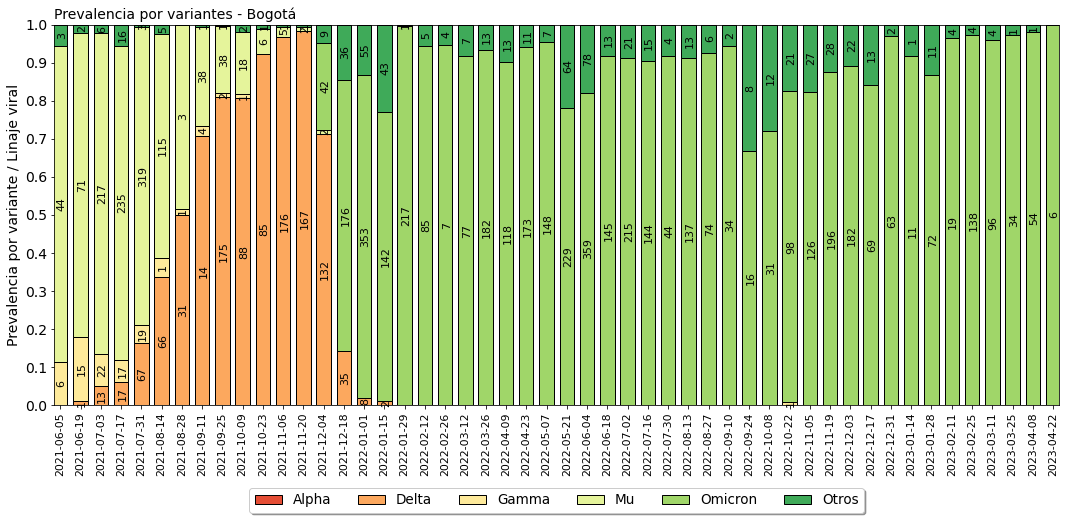

In [7]:
get_GISAID_bar_plot(df_counts, time_period, periods, bar_width, fontsize, fontsize_dates, title="Prevalencia por variantes - Bogotá")

# Omicron linages prevalences

In [22]:
periods = 35
bar_width = 10

In [18]:
keywords_omicron_BA_1 = ["BA.1", "^BA.1."]
keywords_omicron_BA_1_1 = ["^BA.1.1"]
keywords_omicron_BA_2 = ["BA.2","^BA.2."]
keywords_omicron_BA_3 = ["BA.3"]
keywords_omicron_BA_4 = ["BA.4"]
keywords_omicron_BA_5 = ["BA.5"]
keywords_omicron_B_2_12_1 = ["B.2.12.1"]
keywords_omicron_BQ_1 = ["BQ.1", "^BQ.1."]
keywords_omicron_XBB = ["^XBB"]

In [19]:
dicc_variants = {'BA.1':      keywords_omicron_BA_1,
                 'BA.1.1':    keywords_omicron_BA_1_1, 
                 'BA.2':      keywords_omicron_BA_2, 
                 'BA.3':      keywords_omicron_BA_3, 
                 'BA.4':      keywords_omicron_BA_4,
                 'BA.5':      keywords_omicron_BA_5,
                 'B.2.12.1':  keywords_omicron_B_2_12_1,
                 'BQ.1':      keywords_omicron_BQ_1,
                 'XBB':       keywords_omicron_XBB}

In [23]:
df_counts = get_formated_count_dataframes(df_, dicc_variants, time_period, omit_other=True)

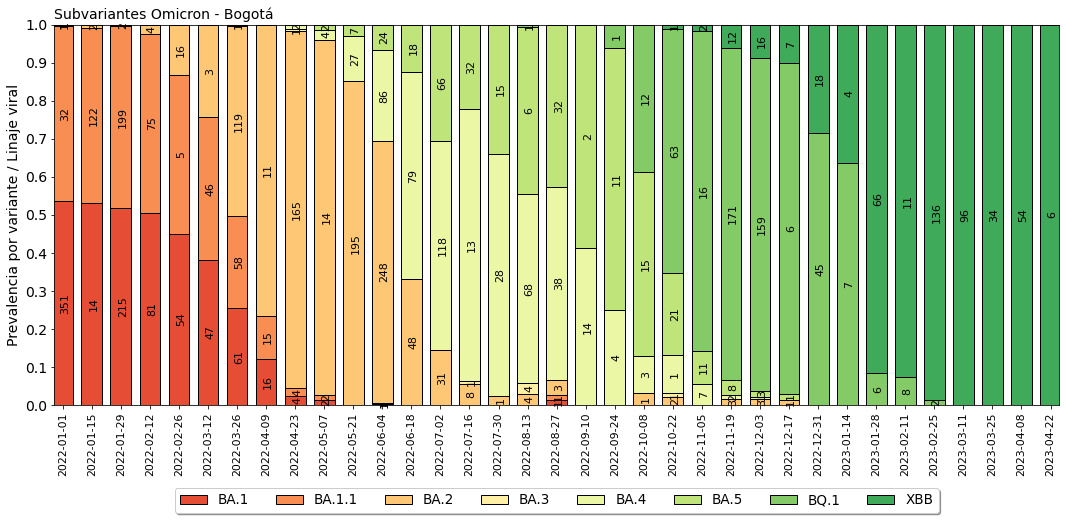

In [25]:
get_GISAID_bar_plot(df_counts, time_period, periods, bar_width, fontsize, fontsize_dates, title="Subvariantes Omicron - Bogotá")